# Image similarity

We'll need a way to keep track of how well our algorithm performs. To do that we'll need an image similirity coefficient.

In [186]:
import gym
from telesketch.envs.discrete_telesketch import DiscreteTelesketchEnv
import numpy as np
import cv2

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import normalized_root_mse
from skimage.metrics import hausdorff_distance
from skimage.feature import match_template

import matplotlib.pyplot as plt

In [199]:
# Ref canvas
ref_canvas = np.full((64, 64, 3), 255, dtype=np.uint8)
ref_canvas = cv2.line(ref_canvas, (0, 0), (32, 32), (0, 0, 0), 2)
ref_canvas = cv2.line(ref_canvas, (32, 32), (64, 32), (0, 0, 0), 2)
#ref_canvas = cv2.line(ref_canvas, (0, 125), (250, 125), (0, 0, 0), 5)

# Sim func
mse = lambda x, y: np.sum((x - y) ** 2)
mse = lambda x, y: np.sum((x - y) ** 2)

In [207]:
# Init env
env = DiscreteTelesketchEnv(ref_canvas, mse, 5, 2, render_mode="image", patch_size=(11, 11))

# Reset and render
env.reset([0, 0]);

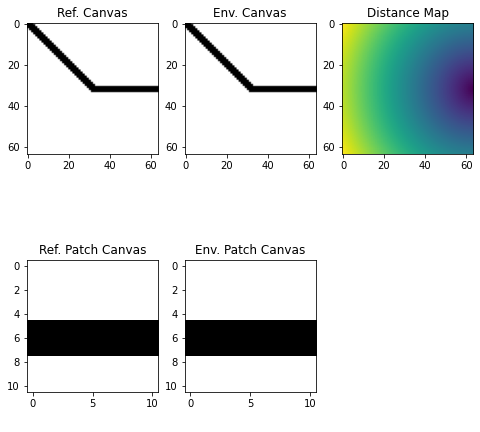

0.0
1.0
[[0.999998]]
[[0.]]
0.0


In [222]:
x = env.step(0)
env.render()

ref = x[0]["ref"]
cnv = x[0]["cnv"]

print(normalized_root_mse(ref, cnv))
print(ssim(ref, cnv, data_range=1))
print(match_template(ref, cnv))
print(cv2.matchTemplate(cnv, ref, cv2.TM_SQDIFF_NORMED))
print(rmse(ref, cnv))

In [258]:
[(1 - np.exp(-x * 2e-3 - 1)) for x in range(500)]

[0.6321205588285577,
 0.632855582442279,
 0.6335891374778405,
 0.6343212268694635,
 0.6350518535455063,
 0.6357810204284766,
 0.6365087304350432,
 0.6372349864760467,
 0.6379597914565125,
 0.6386831482756614,
 0.6394050598269216,
 0.6401255289979404,
 0.6408445586705954,
 0.6415621517210062,
 0.6422783110195458,
 0.6429930394308526,
 0.6437063398138412,
 0.6444182150217139,
 0.6451286679019725,
 0.6458377012964298,
 0.6465453180412198,
 0.6472515209668108,
 0.6479563128980155,
 0.6486596966540021,
 0.6493616750483071,
 0.6500622508888447,
 0.6507614269779192,
 0.651459206112236,
 0.6521555910829127,
 0.6528505846754897,
 0.6535441896699425,
 0.6542364088406922,
 0.6549272449566163,
 0.65561670078106,
 0.6563047790718477,
 0.6569914825812934,
 0.657676814056212,
 0.6583607762379305,
 0.6590433718622984,
 0.6597246036596992,
 0.6604044743550609,
 0.6610829866678671,
 0.6617601433121683,
 0.6624359469965917,
 0.6631104004243529,
 0.6637835062932667,
 0.6644552672957573,
 0.665125686118869

In [198]:
np.where((ref - cnv) ** 2 > 0, 2, 1) / 3

array([[0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        0.33333333],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        0.33333333],
       [0.66666667, 0.66666667, 0.66666667, ..., 0.33333333, 0.33333333,
        0.33333333],
       ...,
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        0.33333333],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        0.33333333],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
        0.33333333]])

In [255]:
(1 - np.exp(-1 * 1e-3 - 1.5))

0.7770928584838176

In [128]:
cv2.findNonZero(ref)

array([[[ 3,  0]],

       [[ 4,  0]],

       [[ 5,  0]],

       ...,

       [[61, 63]],

       [[62, 63]],

       [[63, 63]]], dtype=int32)

In [42]:
#ref_canvas = np.full((250, 250, 3), dtype=np.uint8)
px, py = x[0]["loc"][0], x[0]["loc"][1]
r, c = np.indices((250, 250))

m = np.sqrt((r - px) ** 2 + (c - py) ** 2) / 250


In [ ]:
match_template(image, coin)

In [43]:
mean_squared_error(img, img)

NameError: name 'plt' is not defined

In [9]:
21 % 2

1